In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import knapsack
import time

In [ ]:
class Knapsack01Problem:
    def __init__(self, test, testno):
        self.items = []
        self.capacities = 0
        self.test = test
        self.testno = testno

        self.__initData()
    def __len__(self):
        return len(self.items)

    def __initData(self):
        self.items = []
        fileName = './knapsackOR/' + self.test + '/' + self.testno + '.kp'
        with open(fileName,'r') as testcase:
            data = testcase.readlines()

            length = int(data[1])
            self.capacities = int(data[2])
            for i in range(0, length):
                row_data = data[4+i].split()
                name, value, weight = 'item' + str(i), int(row_data[0]), int(row_data[1]) 
                self.items.append((name, weight, value))
    
    def getValue(self, zeroOneList):

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.capacities:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue
    
    def printItems(self, zeroOneList):
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.capacities:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))


In [ ]:
#This is mut flip bit
P_CROSSOVER = 0.78  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 150
HALL_OF_FAME_SIZE = 1

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED) 
toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1) #register a function zeroOrOne with method derived from function random.randint and have 2 argument 0 and 1

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #create an class named FitnessMax inherit from base.Fitness and contain a self.weights

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax) #create an Individual class based on list and having a variable fitness

# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple

toolbox.register("evaluate", knapsackValue) #Register the name evaluate for function knapsackValue

# genetic operators:mutFlipBit
# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)


# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

resultFileName = './resultGA_tuned_2.txt'
with open(resultFileName,'w+') as writer:
    writer.write('Test,items,Value,Time\n')
    for test in ['00Uncorrelated','01WeaklyCorrelated','02StronglyCorrelated','03InverseStronglyCorrelated','04AlmostStronglyCorrelated','05SubsetSum','06UncorrelatedWithSimilarWeights','07SpannerUncorrelated','08SpannerWeaklyCorrelated','09SpannerStronglyCorrelated','10MultipleStronglyCorrelated','11ProfitCeiling','12Circle']:
            for testno in ['n00050','n00100','n00200','n00500','n01000']:
                start = time.time()
                knapsack = Knapsack01Problem(test,testno)
                
                POPULATION_SIZE = int(1.5*int(testno[1:]))
                # create the individual operator to fill up an Individual instance:
                toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

                # create the population operator to generate a list of individuals:
                toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

                #This is part is for crossovertype
                # Flip-bit mutation:
                # indpb: Independent probability for each attribute to be flipped
                toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))
                #end crossover type

                population = toolbox.populationCreator(n=POPULATION_SIZE)
                
                # define the hall-of-fame object:
                hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

                # perform the Genetic Algorithm flow with hof feature added:
                population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)
                end = time.time()
                best = hof.items[0]
                computedValue = best.fitness.values[0]

                final = f'{test},{testno},{computedValue},{end-start}\n'
                print(final)
                writer.write(final)

In [ ]:
resultFileName = './resultGA_' + str(POPULATION_SIZE) + ',' + str(P_MUTATION) + ',' + str(P_CROSSOVER) + ',' + str(MAX_GENERATIONS) + '.txt'
with open(resultFileName,'w+') as writer:
    writer.write('Test,items,Value,Time\n')
    for test in ['00Uncorrelated','01WeaklyCorrelated','02StronglyCorrelated','03InverseStronglyCorrelated','04AlmostStronglyCorrelated','05SubsetSum','06UncorrelatedWithSimilarWeights','07SpannerUncorrelated','08SpannerWeaklyCorrelated','09SpannerStronglyCorrelated','10MultipleStronglyCorrelated','11ProfitCeiling','12Circle']:
            for testno in ['n00050','n00100','n00200','n00500','n01000']:
                start = time.time()
                knapsack = Knapsack01Problem(test,testno)
                
                # create the individual operator to fill up an Individual instance:
                toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

                # create the population operator to generate a list of individuals:
                toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

                #This is part is for crossovertype
                # Flip-bit mutation:
                # indpb: Independent probability for each attribute to be flipped
                toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))
                #end crossover type

                population = toolbox.populationCreator(n=POPULATION_SIZE)
                
                # define the hall-of-fame object:
                hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

                # perform the Genetic Algorithm flow with hof feature added:
                population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)
                end = time.time()
                best = hof.items[0]
                computedValue = best.fitness.values[0]

                final = f'{test},{testno},{computedValue},{end-start}\n'
                writer.write(final)


In [ ]:
import pandas as pd
import os


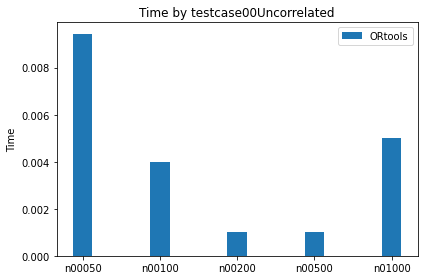

<Figure size 432x288 with 0 Axes>

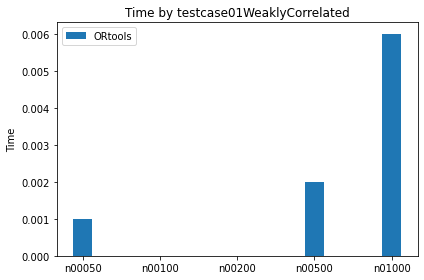

<Figure size 432x288 with 0 Axes>

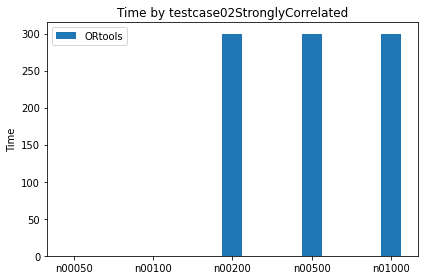

<Figure size 432x288 with 0 Axes>

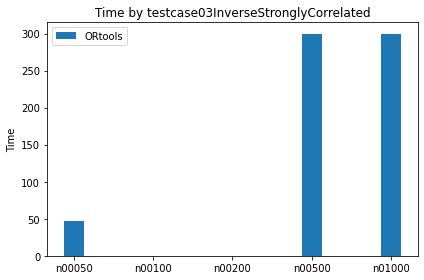

<Figure size 432x288 with 0 Axes>

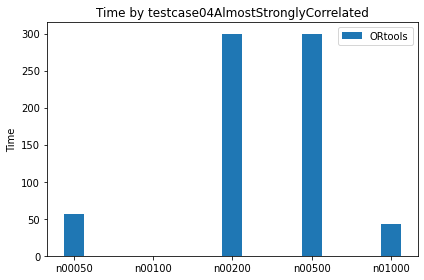

<Figure size 432x288 with 0 Axes>

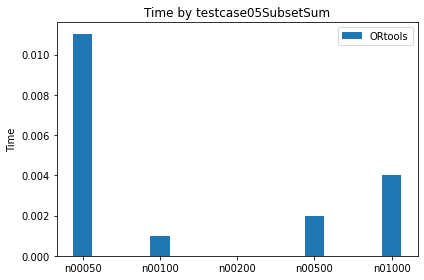

<Figure size 432x288 with 0 Axes>

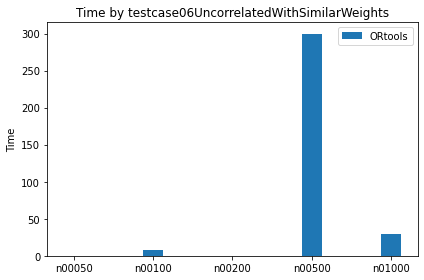

<Figure size 432x288 with 0 Axes>

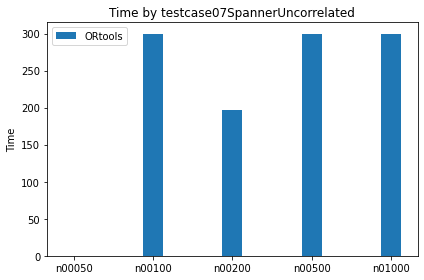

<Figure size 432x288 with 0 Axes>

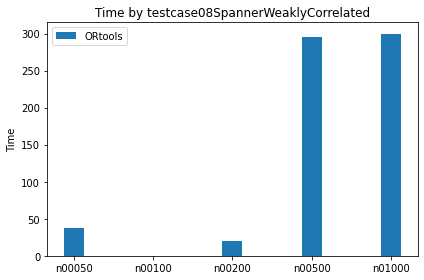

<Figure size 432x288 with 0 Axes>

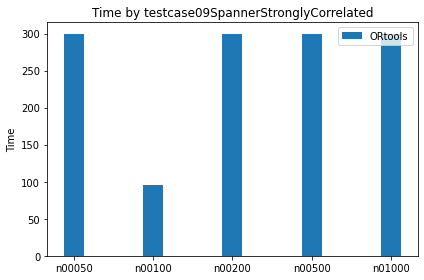

<Figure size 432x288 with 0 Axes>

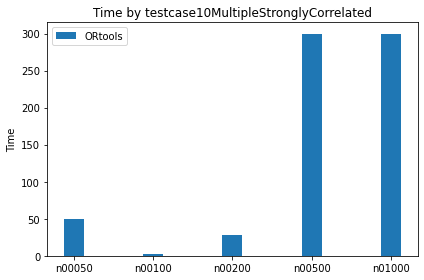

<Figure size 432x288 with 0 Axes>

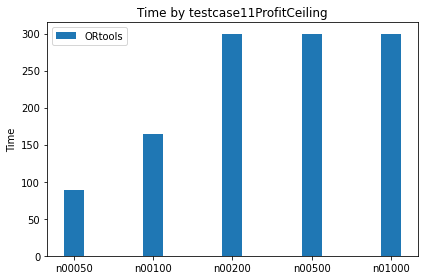

<Figure size 432x288 with 0 Axes>

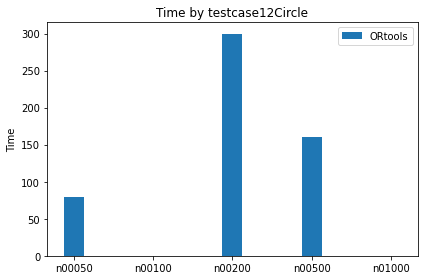

<Figure size 432x288 with 0 Axes>

In [117]:

line =[i for i in range(1,71,5)]


bigLabel = ['00Uncorrelated','01WeaklyCorrelated','02StronglyCorrelated','03InverseStronglyCorrelated','04AlmostStronglyCorrelated','05SubsetSum','06UncorrelatedWithSimilarWeights','07SpannerUncorrelated','08SpannerWeaklyCorrelated','09SpannerStronglyCorrelated','10MultipleStronglyCorrelated','11ProfitCeiling','12Circle']
smallLabel = ['n00050','n00100','n00200','n00500','n01000']

PATH = './runResult/'
fileNames = os.listdir(PATH)
%matplotlib inline
_type = ['GA 0.01,0.60','GA 0.01,0.78','GA 0.05,0.60','GA 0.05,0.78', 'ORtools']
counter = 0
plotcolor = ['red','green','blue','black','teal']
testCounter=0

width = 0.35

for testCase in range(13):
    fig, ax = plt.subplots()
    values=[]
    times = []
    for file in fileNames:
        if testCase == 0 and file == 'resultOrTools.txt':
            df = pd.read_csv(PATH + file, skiprows=0, nrows=5, index_col = None, header=0)
        else:
            df = pd.read_csv(PATH + file, skiprows=line[testCounter], nrows=5, index_col = None, header=None, names=['Test','items','Value','Time'])

        values.append(df['Value'].tolist())
        times.append(df['Time'].tolist())

    x = np.arange(len(smallLabel))

    ax.bar(x, times[0],0.25,label=_type[4])
        
    ax.set_ylabel('Time')
    ax.set_title('Time by testcase' + str(bigLabel[testCase]))
    ax.set_xticks(x)
    ax.set_xticklabels(smallLabel)
    ax.legend()
    fig.tight_layout()
    plt.savefig('./resultImages/compareTimeOR'+ str(testCase)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    testCounter += 1
    

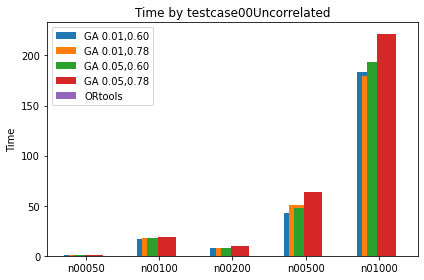

<Figure size 432x288 with 0 Axes>

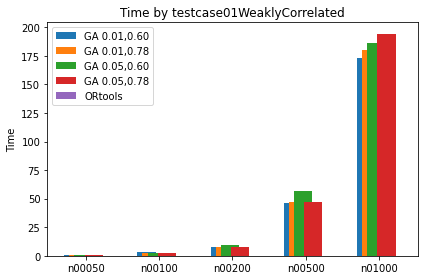

<Figure size 432x288 with 0 Axes>

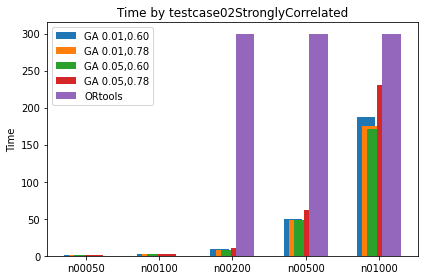

<Figure size 432x288 with 0 Axes>

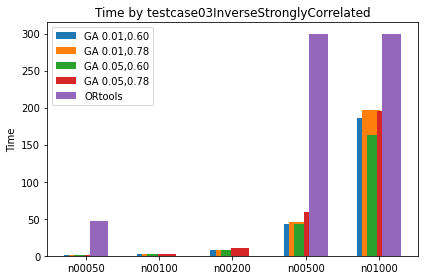

<Figure size 432x288 with 0 Axes>

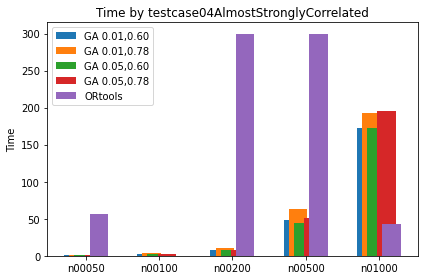

<Figure size 432x288 with 0 Axes>

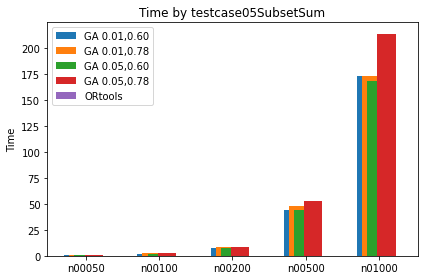

<Figure size 432x288 with 0 Axes>

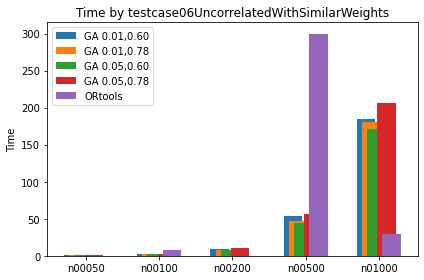

<Figure size 432x288 with 0 Axes>

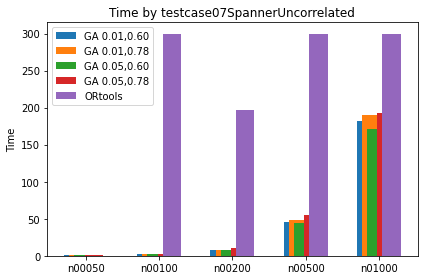

<Figure size 432x288 with 0 Axes>

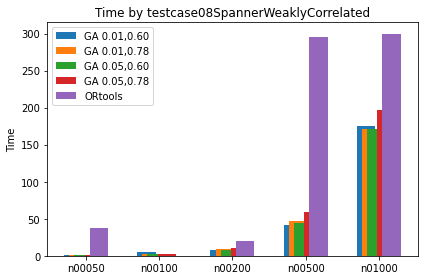

<Figure size 432x288 with 0 Axes>

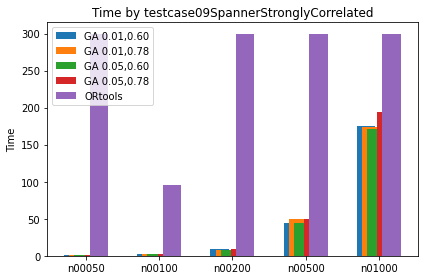

<Figure size 432x288 with 0 Axes>

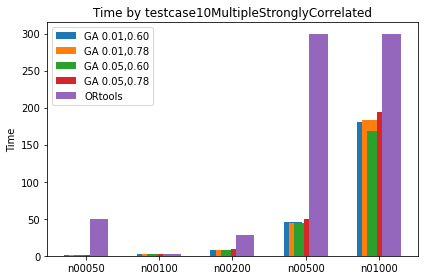

<Figure size 432x288 with 0 Axes>

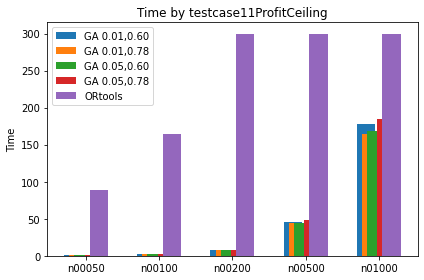

<Figure size 432x288 with 0 Axes>

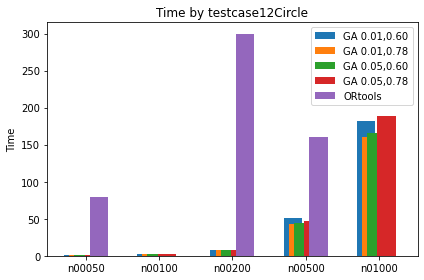

<Figure size 432x288 with 0 Axes>

In [106]:
def changelist(values):
    newValueList = [[] for i in range(len(values[0]))]
    for i in range(len(values)):
        for j in range(len(values[0])):
            newValueList[j].append(int(values[i][j]))
    return newValueList

def changelistTime(values):
    newValueList = [[] for i in range(len(values[0]))]
    for i in range(len(values)):
        for j in range(len(values[0])):
            newValueList[j].append(values[i][j])
    return newValueList

line =[i for i in range(1,71,5)]


bigLabel = ['00Uncorrelated','01WeaklyCorrelated','02StronglyCorrelated','03InverseStronglyCorrelated','04AlmostStronglyCorrelated','05SubsetSum','06UncorrelatedWithSimilarWeights','07SpannerUncorrelated','08SpannerWeaklyCorrelated','09SpannerStronglyCorrelated','10MultipleStronglyCorrelated','11ProfitCeiling','12Circle']
smallLabel = ['n00050','n00100','n00200','n00500','n01000']

PATH = './runResult/'
fileNames = os.listdir(PATH)
%matplotlib inline
_type = ['GA 0.01,0.60','GA 0.01,0.78','GA 0.05,0.60','GA 0.05,0.78', 'ORtools']
counter = 0
plotcolor = ['red','green','blue','black','teal']
testCounter=0

width = 0.35

for testCase in range(13):
    fig, ax = plt.subplots()
    values=[]
    times = []
    for file in fileNames:
        if testCase == 0 and file == 'result0.01,0.60.txt':
            df = pd.read_csv(PATH + file, skiprows=0, nrows=5, index_col = None, header=0)
        else:
            df = pd.read_csv(PATH + file, skiprows=line[testCounter], nrows=5, index_col = None, header=None, names=['Test','items','Value','Time'])

        values.append(df['Value'].tolist())
        times.append(df['Time'].tolist())

    x = np.arange(len(smallLabel))

    for subsubplot in range(5):
        if subsubplot == 0:
            w = -width/2
        elif subsubplot == 1:
            w = -width*0.3
        elif subsubplot == 2:
            w = -width*0.1
        elif subsubplot == 3:
            w = width*0.3
        else:
            w = width/2
        
        ax.bar(x+w, times[subsubplot],0.25,label=_type[subsubplot])
        
    ax.set_ylabel('Time')
    ax.set_title('Time by testcase' + str(bigLabel[testCase]))
    ax.set_xticks(x)
    ax.set_xticklabels(smallLabel)
    ax.legend()
    fig.tight_layout()
    plt.savefig('./resultImages/compareTime'+ str(testCase)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    testCounter += 1
    

In [ ]:
PATH = './plotChangeNGen/'
fileNames = os.listdir(PATH)
%matplotlib inline
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:24], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with different Max Generation property (NGen)')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 
plt.savefig('./resultImages/changeNGen100.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
PATH = './plotChangePSnequal/'
fileNames = os.listdir(PATH)
%matplotlib inline
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:24], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with different Population size with PS!=NGen')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 
plt.savefig('./resultImages/nEqualPS_Ngen.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

PATH = './plotChangePSequal/'
%matplotlib inline
fileNames = os.listdir(PATH)
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:24], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with different Population size with PS=NGen')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 
plt.savefig('./resultImages/EqualPS_Ngen.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#This part is PS=50 and ngen=100
PATH = './resultGA_PS50_NGen100/'
fileNames = os.listdir(PATH)
%matplotlib inline
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:23], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with population size=50, Ngen = 100 and different crossover rate')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 

plt.show()

In [ ]:
#This part is for PS=ngen=100
PATH = './resultGA_PS_100/'
fileNames = os.listdir(PATH)
%matplotlib inline
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:24], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with population size=100 and different crossover rate')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 
plt.savefig('./resultImages/PS100_ChangeCR.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#This part is for PS=ngen=50
PATH = './resultGA_PS_50/'
fileNames = os.listdir(PATH)
%matplotlib inline
plotcolor = ['red','green','blue','black']
i=0
for file in fileNames:
    df = pd.read_csv(PATH + file, header=0,index_col=None,usecols=['Value','Time'], delimiter=',' )
    plt.plot('Value','Time', data=df, label=file[9:23], color=plotcolor[i])
    i+=1

plt.title('Result Applying GA with population size=50 and different crossover rate')
plt.xlabel('Value')
plt.ylabel('Time') 
plt.legend()  
plt.grid() 
plt.savefig('./resultImages/PS50_ChangeCR.png', dpi=300, bbox_inches='tight')
plt.show()
